In [2]:
%config Completer.use_jedi = False
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch as nn

In [67]:
##Now that we have our model saved,
##we will load it
from model import Net
net = Net()
state_dict = torch.load('saved_models/final_model.pt')
net.load_state_dict(state_dict)
print(net)

Net(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv1): Conv2d(1, 68, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(68, 136, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(136, 272, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(272, 544, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(544, 1088, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(1088, 2176, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=2176, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=136, bias=True)
)


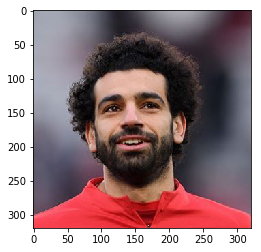

In [106]:
##load in a haar-caascade classifier form cv
haar = cv2.CascadeClassifier("detector_architectures/haarcascade_frontalface_default.xml")

image = cv2.imread("salah.jpg")
image_copy = cv2.cvtColor(image ,  cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
faces = haar.detectMultiScale(image , 1.1 , 3)

plt.imshow(image_copy)
    

In [121]:
def show_keypoints(net , image) :
    net.eval()
    
    figure = plt.figure(figsize=(10,8))
    image_copy = cv2.cvtColor(image ,  cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    ax = figure.add_subplot(121)
    ax.imshow(image_copy)
    ax.set_title('Original')

    roi = image
    ##Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    ## Rescale the detected face to be the expected square size for the CNN (224x224, suggested)
    roi = cv2.resize(roi,(224,224))
    image_copy = cv2.resize(image_copy,(224,224))
    region = roi.copy()

    ## Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = torch.tensor(roi).type(torch.FloatTensor)
    roi = roi.unsqueeze(0)
    roi = roi.unsqueeze(0)
    print(roi.shape)
    ## Make facial keypoint predictions using your loaded, trained network
    key_pts = net(roi)
    key_pts = key_pts.detach()

    key_pts = key_pts.view(68,-1).numpy()
    key_pts = key_pts*50 + 100
    ## Display each detected face and the corresponding keypoints 
    
    ax = figure.add_subplot(122)
    ax.imshow(image_copy)
    ax.scatter(key_pts[:,0] , key_pts[:,1] , s = 20 , c='g' , marker='.')
    ax.set_title('Keypoints')

torch.Size([1, 1, 224, 224])


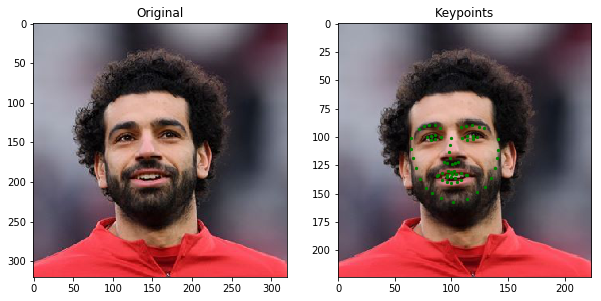

In [122]:
image = cv2.imread("salah.jpg")

show_keypoints(net,image)